5.1a: Introduction to API

In [1]:
from nba_api.stats.static import teams
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
def oneDict(dictList):
    keys = dictList[0].keys()
    outDict = {key: [] for key in keys}
    for thisDict in dictList:
        for (key, value) in thisDict.items():
            outDict[key].append(value)
    return outDict

In [3]:
nbaTeams = teams.get_teams()

nbaTeamDict = oneDict(nbaTeams)
teamsDF = pd.DataFrame(nbaTeamDict)
teamsDF.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [4]:
warriorsDF = teamsDF[teamsDF["nickname"] == "Warriors"]
warriorsDF

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [10]:
warriorsID = warriorsDF[["id"]].values[0][0]
warriorsID

1610612744

In [12]:
from nba_api.stats.endpoints import leaguegamefinder

In [16]:
gameFinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=warriorsID)
games = gameFinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22023,1610612744,GSW,Golden State Warriors,0022301155,2024-04-09,GSW @ LAL,W,241,134,...,0.667,4.0,38.0,42.0,37,3,12,15,17,14.0
1,22023,1610612744,GSW,Golden State Warriors,0022301142,2024-04-07,GSW vs. UTA,W,241,118,...,1.000,11.0,36.0,47.0,32,9,8,13,19,8.0
2,22023,1610612744,GSW,Golden State Warriors,0022301097,2024-04-05,GSW @ DAL,L,239,106,...,0.667,11.0,33.0,44.0,27,12,5,15,19,-2.0
3,22023,1610612744,GSW,Golden State Warriors,0022301113,2024-04-04,GSW @ HOU,W,241,133,...,0.880,12.0,31.0,43.0,29,6,2,18,23,23.0
4,22023,1610612744,GSW,Golden State Warriors,0022300589,2024-04-02,GSW vs. DAL,W,242,104,...,1.000,11.0,41.0,52.0,29,9,4,17,18,4.0


In [19]:
gamesGSWvsTOR = games[games["MATCHUP"] == "GSW vs. TOR"]
gamesGSWatTOR = games[games["MATCHUP"] == "GSW @ TOR"]

In [20]:
gamesGSWvsTOR["PLUS_MINUS"].mean()

3.375

In [21]:
gamesGSWatTOR["PLUS_MINUS"].mean()

-1.7212121212121212

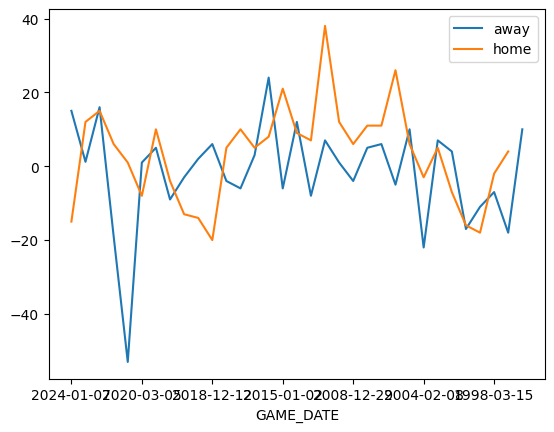

In [22]:
fig, ax = plt.subplots()

gamesGSWatTOR.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
gamesGSWvsTOR.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

In [24]:
gamesGSWvsTOR["PTS"].mean()

107.875

In [25]:
gamesGSWatTOR["PTS"].mean()

103.24242424242425